In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [3]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape
# rows = 768, cols=9

(768, 9)

#### Data Prepropessing

#### 1) Handling Null values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### 2) Hanlding duplicate rows

In [8]:
df.duplicated().sum()

0

#### 3) Check data types

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

#### 4) Check target variable

In [10]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
for i in df.columns[:-1]:
    print(f'Feature {i}')
    print(df[i].nunique())
    print('*'*30)

Feature Pregnancies
17
******************************
Feature Glucose
136
******************************
Feature BloodPressure
47
******************************
Feature SkinThickness
51
******************************
Feature Insulin
186
******************************
Feature BMI
248
******************************
Feature DiabetesPedigreeFunction
517
******************************
Feature Age
52
******************************


In [12]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

### EDA

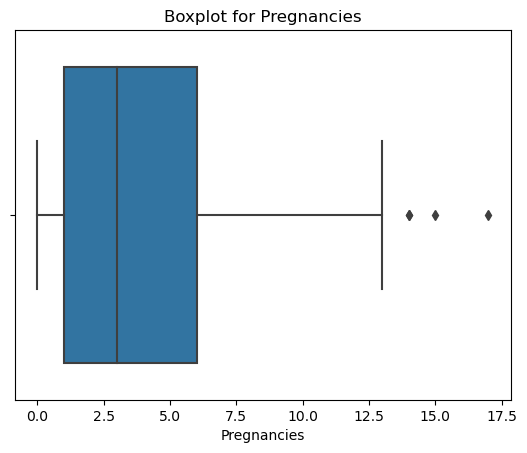

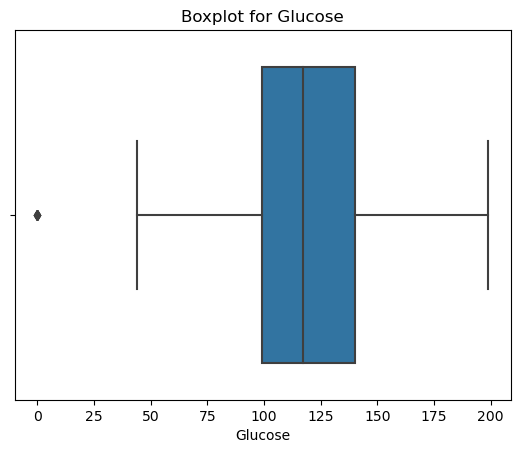

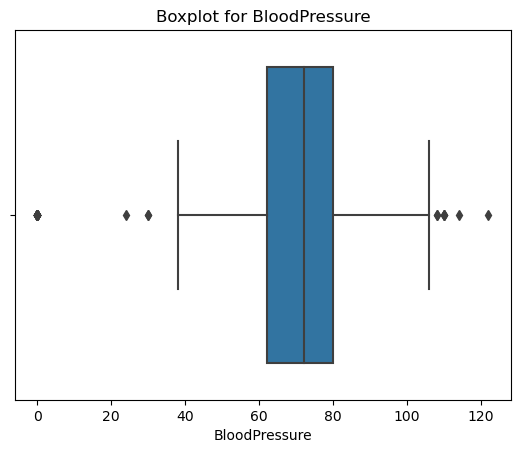

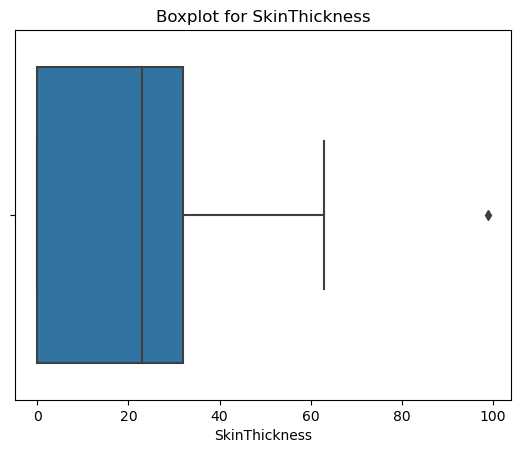

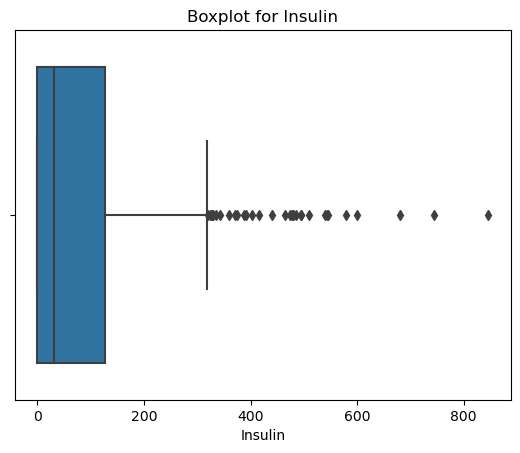

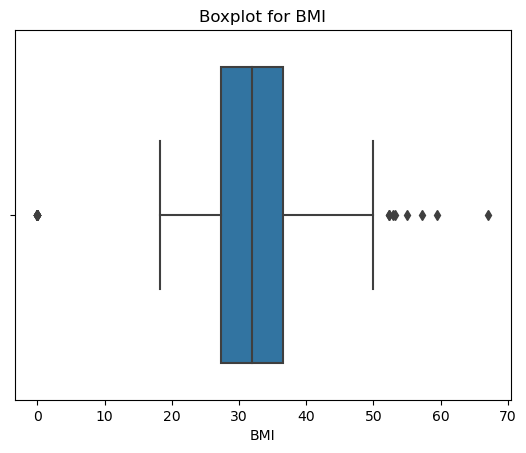

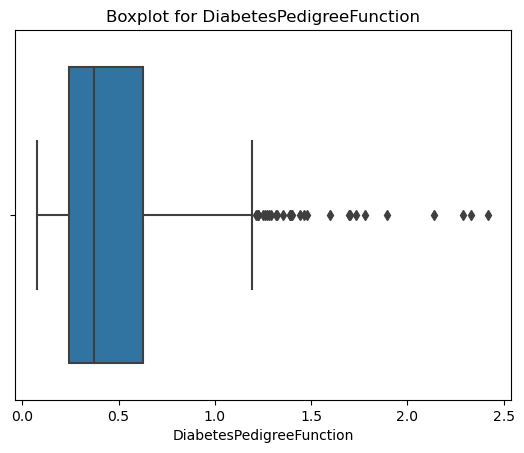

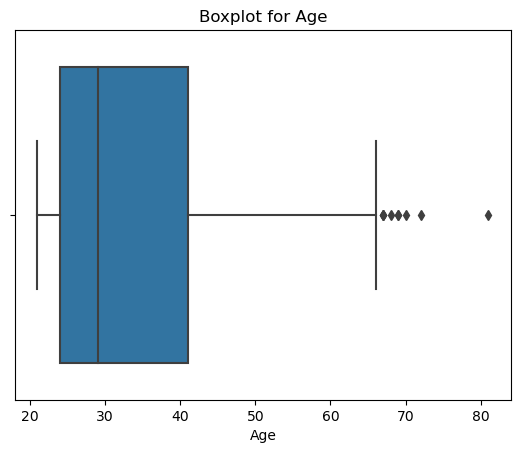

In [15]:
for i in df.columns[:-1]:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

#### Outliers are present in
<pre>
1) Pregnancies has outliers beyond Q3.
2) Glucose has outliers beyond Q1.
3) BP has outliers beyond Q1 and beyond Q3.
4) SkinThickness has outliers beyond Q3.
5) Insulin  and DPFun has major outliers beyond Q3
6) BMI has outliers beyond Q1 and beyond Q3.
7) Age has outliers beyond Q3.
</pre>

#### Correlation

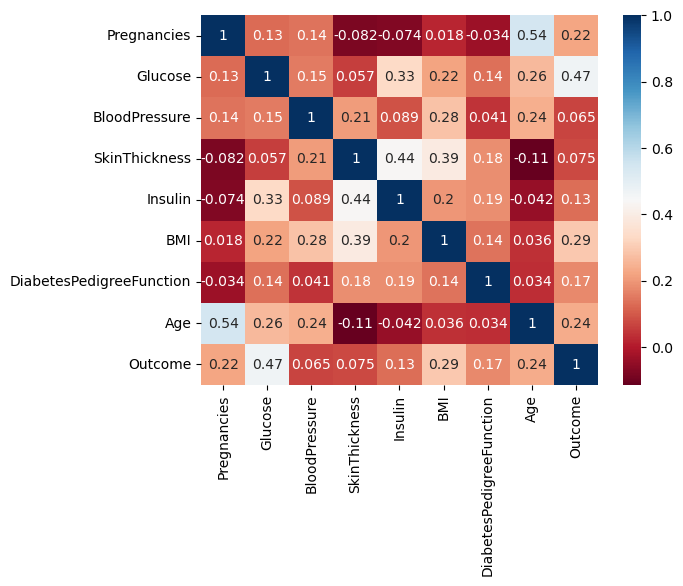

In [16]:
corr = df.corr()

sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

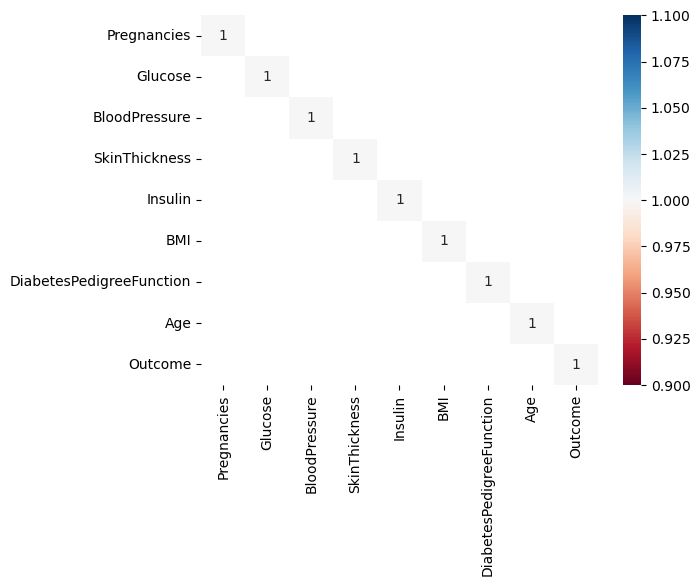

In [17]:
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='RdBu')
plt.show()

### Outlier Treatment

In [19]:
df.describe(percentiles=[0.01,0.02,0.03,0.05]).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.00000,0.00000,3.0000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,73.01000,79.00000,117.0000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,0.00000,38.70000,72.0000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.00000,0.00000,23.0000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.00000,0.00000,30.5000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,19.90100,21.80000,32.0000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.12701,0.14035,0.3725,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.00000,21.00000,29.0000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.00000,0.00000,0.0000,1.00


In [23]:
print(df[df['Glucose']<69].shape)  # 2 percentile
print(df[df['BloodPressure']<38.7].shape)  # 5 percentile
print(df[df['BMI']<19.16800].shape)  # 3 percentile

(16, 9)
(39, 9)
(16, 9)


In [24]:
df.describe(percentiles=[0.95,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,97%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,3.0000,10.00000,11.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,117.0000,181.00000,187.99000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,72.0000,90.00000,94.99000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,23.0000,44.00000,46.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,30.5000,293.00000,369.90000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,32.0000,44.39500,46.10000,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.3725,1.13285,1.25793,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,29.0000,58.00000,62.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.0000,1.00000,1.00000,1.00000,1.00000,1.00


In [35]:
print(df[df['Pregnancies']>13].shape)
print(df[df['Glucose']>196].shape)
print(df[df['BloodPressure']>106].shape)
print(df[df['SkinThickness']>51].shape)
print(df[df['Insulin']>369.900].shape)
print(df[df['DiabetesPedigreeFunction']>1.25793].shape)
print(df[df['BMI']>50.7590].shape)
print(df[df['Age']>67.0].shape)
# Glucose

(4, 9)
(6, 9)
(7, 9)
(8, 9)
(24, 9)
(24, 9)
(8, 9)
(6, 9)


In [37]:
def outlier_treatment_up(x):
    x = x.clip(upper=x.quantile(0.97))
    return x

def outlier_treatment_low(x):
    x = x.clip(lower=x.quantile(0.05))
    return x

In [ ]:
# 1) Pregnancies has outliers beyond Q3.
# 2) Glucose has outliers beyond Q1.
# 3) BP has outliers beyond Q1 and beyond Q3.
# 4) SkinThickness has outliers beyond Q3.
# 5) Insulin  and DPFun has major outliers beyond Q3
# 6) BMI has outliers beyond Q1 and beyond Q3.
# 7) Age has outliers beyond Q3.

In [39]:
up_outliers = df.columns[:-1]
print(up_outliers)
low_outliers = ['Glucose', 'BloodPressure','BMI']
print(low_outliers)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
['Glucose', 'BloodPressure', 'BMI']


In [40]:
df[up_outliers] = df[up_outliers].apply(outlier_treatment_up)
df[low_outliers] = df[low_outliers].apply(outlier_treatment_low)

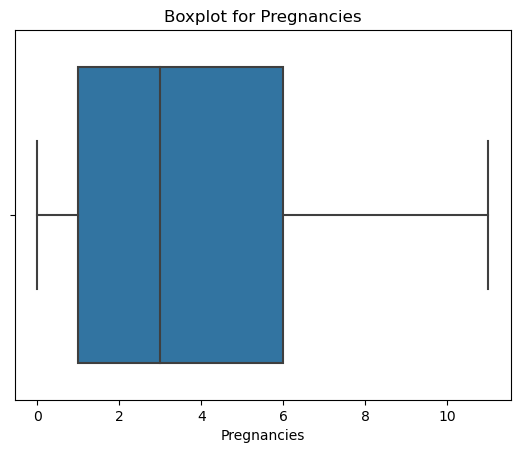

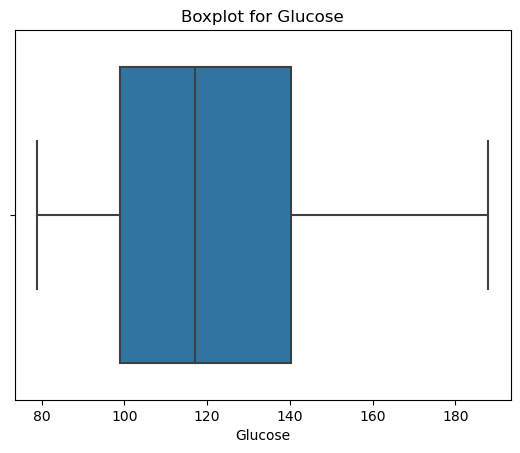

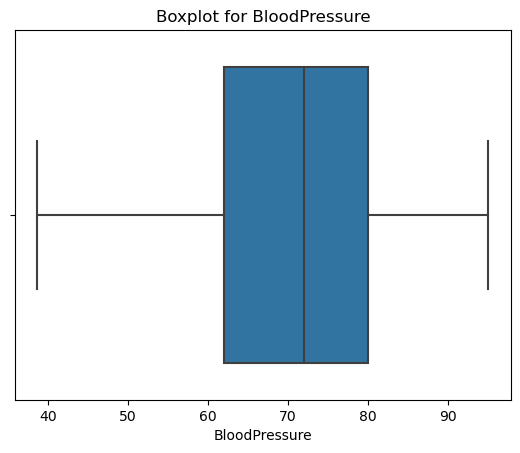

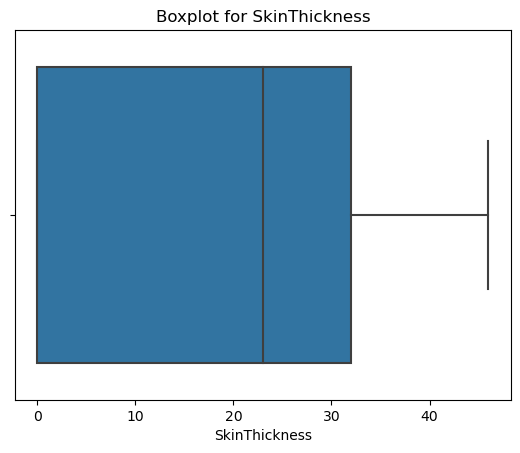

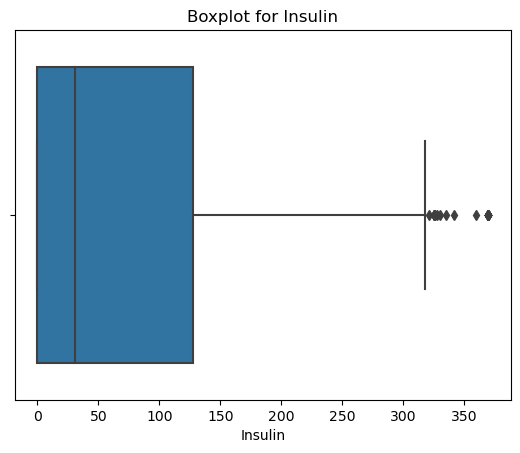

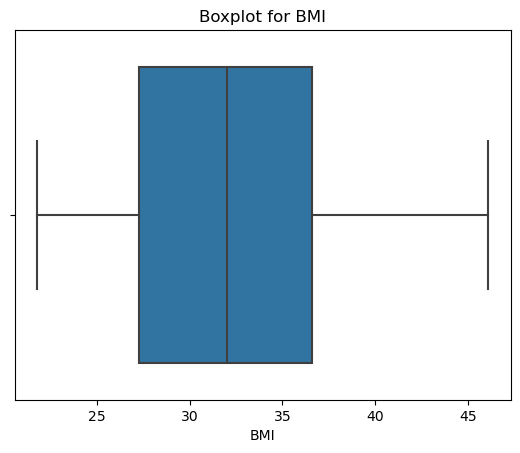

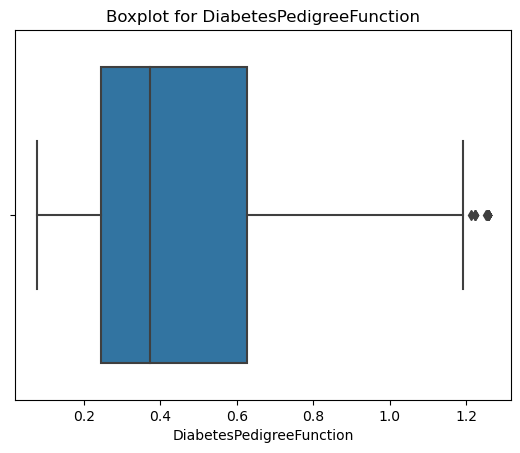

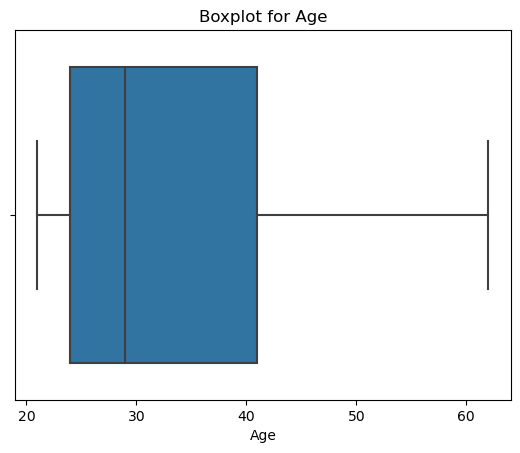

In [41]:
for i in df.columns[:-1]:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

### Select x and y

In [42]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [43]:
from sklearn.model_selection  import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [46]:
from sklearn.metrics import confusion_matrix,classification_report

In [53]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print(cm)
    print(classification_report(ytest,ypred))

#### Log Reg

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [50]:
print('Train Scr',lr1.score(x_train,y_train))
print('Test Scr',lr1.score(x_test,y_test))

Train Scr 0.7839851024208566
Test Scr 0.7445887445887446


In [51]:
ypred = lr1.predict(x_test)
print(ypred)

[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 0]


In [54]:
eval_model(y_test,ypred)

[[124  27]
 [ 32  48]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



In [ ]:
# DT, RF, SVM, KNN, NB, Adaboost,XGBoost

In [55]:
from sklearn.metrics import roc_auc_score,roc_curve

In [67]:
res = lr1.predict_proba(x_test)
print(res[:5])

[[0.75073508 0.24926492]
 [0.8199554  0.1800446 ]
 [0.89011444 0.10988556]
 [0.87408673 0.12591327]
 [0.50820996 0.49179004]]


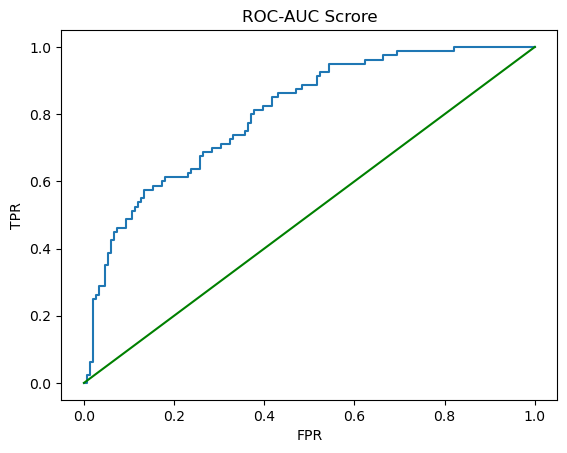

In [68]:
# res = lr1.predict_proba(x_test[:,1])

fpr,tpr,thresh = roc_curve(y_test,res[:,1])
auc_scr = roc_auc_score(y_test,res[:,1])
print('AUC',auc_scr)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],color='green')
plt.title('ROC-AUC Scrore')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [71]:
idx = np.argmax(tpr*(1-fpr))
print(idx)
print(thresh[62])

62
0.256647652285568
